# 形态学操作

## 形态学-腐蚀操作
腐蚀是最基本的形态学操作之一，它能够将图像的边界点消除，使图像沿着边界向内收缩，也可以将小于指定结构体元素的部分去除。

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("j-erode.PNG")
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations=1)
cv2.imshow('erosion',erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
pie = cv2.imread('circle.PNG')
cv2.imshow('circle',pie)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
kernel = np.ones((30,30),np.uint8)
erosion1 = cv2.erode(pie,kernel,iterations=1)
erosion2 = cv2.erode(pie,kernel,iterations=2)
erosion3 = cv2.erode(pie,kernel,iterations=3)
res = np.hstack((erosion1,erosion2,erosion3))
cv2.imshow('res',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 形态学-膨胀操作
和腐蚀互为逆操作，腐蚀操作后原来的目标图像被腐蚀掉一部分，然后使用膨胀操作可以放大一点

In [6]:
kernel = np.ones((3,3),np.uint8)
dilate = cv2.dilate(img,kernel,iterations=1)
cv2.imshow('dilate',dilate)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 开运算与闭运算

In [7]:
#　开：先腐蚀再膨胀
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
cv2.imshow('opening',opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
#　开：先腐蚀再膨胀
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
cv2.imshow('opening',opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 梯度计算

In [9]:
# 梯度=膨胀-腐蚀
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
cv2.imshow('gradient',gradient)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 礼帽与黑帽
礼帽 = 原始输入-开运算结果
黑帽 = 闭运算-原始输入

In [10]:
# 礼帽
tophat = cv2.morphologyEx(img,cv2.MORPH_TOPHAT,kernel)
cv2.imshow('tophat',tophat)
cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
# 黑帽
img = cv2.imread('j-erode.png')
blackhat = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT,kernel)
cv2.imshow('blackhat',blackhat)
cv2.waitKey()
cv2.destroyAllWindows()

## 图像阈值


In [12]:
import cv2 #opencv读取的格式是BGR
import numpy as np
import matplotlib.pyplot as plt#Matplotlib是RGB
%matplotlib inline 

img=cv2.imread('cat.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray.shape

(414, 500)

In [13]:
cv2.imshow("img_gray", img_gray)
cv2.waitKey(0)    
cv2.destroyAllWindows() 

### HSV
- H - 色调（主波长）。 
- S - 饱和度（纯度/颜色的阴影）。 
- V值（强度）

In [14]:
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2.imshow('hsv',hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### ret, dst = cv2.threshold(src, thresh, maxval, type)

- src： 输入图，只能输入单通道图像，通常来说为灰度图
- dst： 输出图
- thresh： 阈值
- maxval： 当像素值超过了阈值（或者小于阈值，根据type来决定），所赋予的值
- type：二值化操作的类型，包含以下5种类型： cv2.THRESH_BINARY； cv2.THRESH_BINARY_INV； cv2.THRESH_TRUNC； cv2.THRESH_TOZERO；cv2.THRESH_TOZERO_INV

- cv2.THRESH_BINARY           超过阈值部分取maxval（最大值），否则取0
- cv2.THRESH_BINARY_INV    THRESH_BINARY的反转
- cv2.THRESH_TRUNC            大于阈值部分设为阈值，否则不变
- cv2.THRESH_TOZERO          大于阈值部分不改变，否则设为0
- cv2.THRESH_TOZERO_INV  THRESH_TOZERO的反转

D:\code\CodeLanguage\Anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


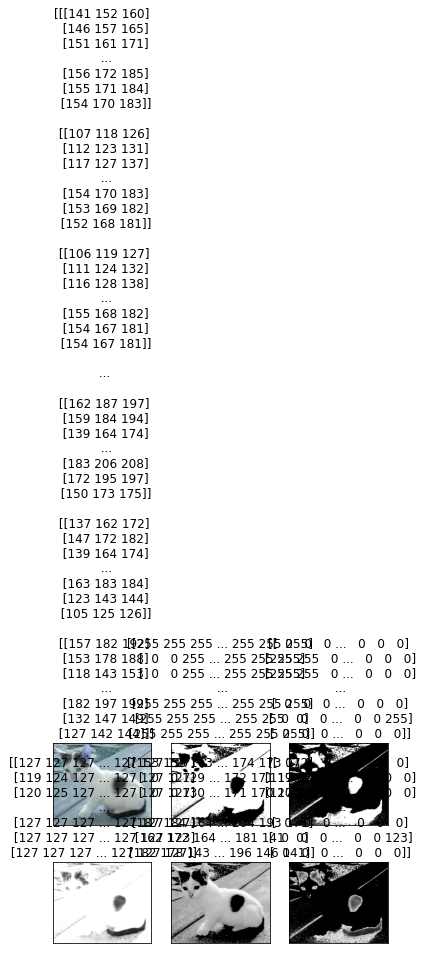

In [15]:
ret,thresh1 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_gray,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO_INV)

titles = ['ORIGINAL IMAGE', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i + 1),plt.imshow(images[i], 'gray')
    plt.title(images[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Canny边缘检测
边缘检测只能对灰度图像进行处理
- 1)        使用高斯滤波器，以平滑图像，滤除噪声。因为噪声就是灰度变化很大的地方，所以很容易被识别伪边缘。

- 2)        计算图像中每个像素点的梯度强度和方向。计算图像梯度可能得到边缘，因为梯度是灰度变化明显的地方，并且边缘也是灰度变化明显的地方，通过这一步，可以获得所有可能是边缘的集合。

- 3)        应用非极大值（Non-Maximum Suppression）抑制，以消除边缘检测带来的杂散响应。通常灰度变化的地方都比较集中，灰度变化最大的保留下来，其他的去除，这样可以去除一大部分的点。将有多个像素宽的边缘变成一个单像素宽的边缘。即“胖边缘”变成“瘦边缘”。

- 4)        应用双阈值（Double-Threshold）检测来确定真实的和潜在的边缘。通过非极大值抑制后，仍然有很多的可能边缘点，进一步的设置一个双阈值，即低阈值（low），高阈值（high）。灰度变化大于high的，设置为强边缘像素，低于low的，剔除。在low和high之间的设置为弱边缘。进一步判断，如果其领域内有强边缘像素，保留，如果没有，剔除。这样做的目的是只保留强边缘轮廓的话，有些边缘可能不闭合，需要从满足low和high之间的点进行补充，使得边缘尽可能的闭合。

- 5)        通过抑制孤立的弱边缘最终完成边缘检测。

In [16]:
img = cv2.imread('lena.jpg')
v1 = cv2.Canny(img,80,150)
v2 = cv2.Canny(img,50,100)

res = np.hstack((v1,v2))
cv2.imshow('res',res)
cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
img = cv2.imread('car.png')
v1 = cv2.Canny(img,120,250)
v2 = cv2.Canny(img,50,100)

res = np.hstack((v1,v2))
cv2.imshow('res',res)
cv2.waitKey()
cv2.destroyAllWindows()

## 图像轮廓
#### cv2.findContours(img,mode,method)
mode:轮廓检索模式
- RETR_EXTERNAL ：只检索最外面的轮廓；
- RETR_LIST：检索所有的轮廓，并将其保存到一条链表当中；
- RETR_CCOMP：检索所有的轮廓，并将他们组织为两层：顶层是各部分的外部边界，第二层是空洞的边界;
- RETR_TREE：检索所有的轮廓，并重构嵌套轮廓的整个层次;

method:轮廓逼近方法
- CHAIN_APPROX_NONE：以Freeman链码的方式输出轮廓，所有其他方法输出多边形（顶点的序列）。
- CHAIN_APPROX_SIMPLE:压缩水平的、垂直的和斜的部分，也就是，函数只保留他们的终点部分。

![title](chain.png)

为了更高的的准确率，使用二值图像

In [18]:
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [27]:
img = cv2.imread('contours.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('thresh',thresh)
cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

contours保存的是所有的轮廓的信息，是一个list

### 绘制轮廓
第三个参数是绘制第几个轮廓，-1是把所有的轮廓都画出来。最后一个2是线条的宽度

In [21]:
# 注意，这里需要copy，不然原图会变
draw_img = img.copy()
# 传入绘制图像，轮廓，轮廓索引，颜色模式，线条宽度
res = cv2.drawContours(draw_img,contours,3,(0,0,255),2)
cv_show('res',res)

### 轮廓特征

In [22]:
cnt = contours[0]

In [23]:
cv2.contourArea(cnt)

8500.5

In [24]:
cv2.arcLength(cnt,True)

437.9482651948929

### 轮廓近似

In [28]:
img = cv2.imread('contours2.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img, [cnt], -1, (0, 0, 255), 2)
cv_show('res',res)

In [26]:
epsilon = 0.15 * cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
draw_img = img.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 2)
cv_show('res',res)

 ### 边界矩形

In [30]:
img = cv2.imread('contours.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

x, y, w, h = cv2.boundingRect(cnt)
img = cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
cv_show('img',img)

In [31]:
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print('轮廓面积与边界矩形比',extent)

轮廓面积与边界矩形比 0.5154317244724715


### 外接圆

In [32]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,255,0),2)
cv_show('img',img)

## 模板匹配
模板匹配和卷积原理很像，模板在原图像上从原点开始滑动，计算模板与（图像被模板覆盖的地方）的差别程度，这个差别程度的计算方法在opencv里有6种，然后将每次计算的结果放入一个矩阵里，作为结果输出。假如原图形是AxB大小，而模板是axb大小，则输出结果的矩阵是(A-a+1)x(B-b+1)

In [34]:
# 模板匹配
img = cv2.imread('lena.jpg',0)
template = cv2.imread('face.jpg',0)
h, w = template.shape[:2]

In [35]:
img.shape

(263, 263)

In [36]:
template.shape

(110, 85)

- TM_SQDIFF：计算平方不同，计算出来的值越小，越相关        
- TM_CCORR：计算相关性，计算出来的值越大，越相关
- TM_CCOEFF：计算相关系数，计算出来的值越大，越相关
- TM_SQDIFF_NORMED：计算归一化平方不同，计算出来的值越接近0，越相关
- TM_CCORR_NORMED：计算归一化相关性，计算出来的值越接近1，越相关
- TM_CCOEFF_NORMED：计算归一化相关系数，计算出来的值越接近1，越相关


In [37]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [38]:
res = cv2.matchTemplate(img,template,cv2.TM_SQDIFF)
res.shape

(154, 179)

In [40]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [41]:
min_val

44832.0

In [42]:
min_loc

(107, 89)

In [43]:
max_val

74164096.0

In [44]:
max_loc

(159, 62)

4


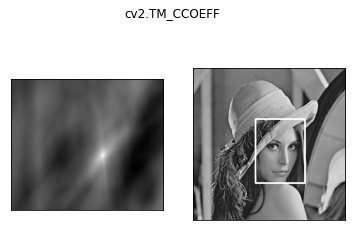

5


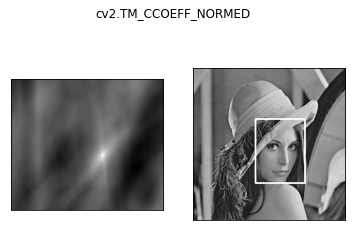

2


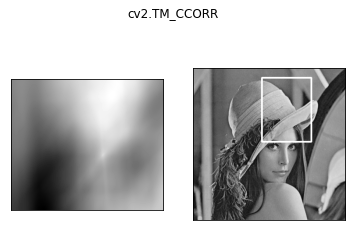

3


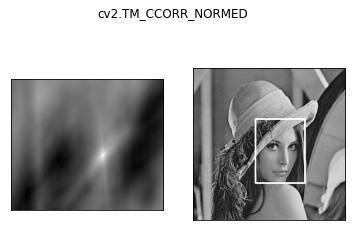

0


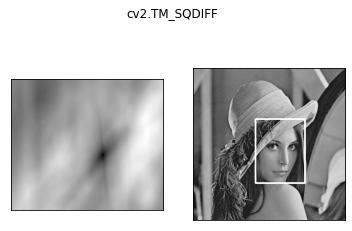

1


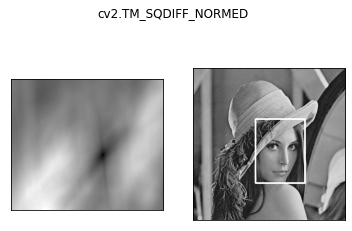

In [46]:
for meth in methods:
    img2 = img.copy()
    method = eval(meth)
    print(method)
    
    res = cv2.matchTemplate(img2,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0]+w, top_left[1]+h)
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.xticks([]), plt.yticks([])  # 隐藏坐标轴
    plt.subplot(122), plt.imshow(img2, cmap='gray')
    plt.xticks([]), plt.yticks([])  # 隐藏坐标轴
    plt.suptitle(meth)
    plt.show()

## 图像金字塔
- 高斯金字塔
- 拉普拉斯金字塔

高斯金字塔：向下采样方法（缩小）
高斯金字塔：向上采样方法（放大）

In [47]:
img = cv2.imread('AM.png')
cv_show('img',img)
print(img.shape)

(442, 340, 3)


In [48]:
up = cv2.pyrUp(img)
cv_show('up',up)
print(up.shape)

(884, 680, 3)


In [49]:
down = cv2.pyrDown(img)
cv_show('down',down)
print(down.shape)

(221, 170, 3)


In [51]:
up2 = cv2.pyrUp(up)
cv_show('up2',up2)
print(up2.shape)

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\code\CodeLanguage\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "D:\code\CodeLanguage\Anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 远程主机强迫关闭了一个现有的连接。


(1768, 1360, 3)


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\code\CodeLanguage\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "D:\code\CodeLanguage\Anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 远程主机强迫关闭了一个现有的连接。
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\code\CodeLanguage\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "D:\code\CodeLanguage\Anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 远程主机强迫关闭了一个现有的连接。


In [52]:
up=cv2.pyrUp(img)
up_down=cv2.pyrDown(up)
cv_show('up_down',up_down)

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\code\CodeLanguage\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "D:\code\CodeLanguage\Anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 远程主机强迫关闭了一个现有的连接。
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\code\CodeLanguage\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "D:\code\CodeLanguage\Anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 远程主机强迫关闭了一个现有的连接。


error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - Can't convert object to 'str' for 'winname'
>  - Can't convert object to 'str' for 'winname'
>  - Can't convert object to 'str' for 'winname'


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\code\CodeLanguage\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "D:\code\CodeLanguage\Anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 远程主机强迫关闭了一个现有的连接。
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\code\CodeLanguage\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "D:\code\CodeLanguage\Anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 远程主机强迫关闭了一个现有的连接。
Exception in callback BaseSelectorEventLoop._r

In [ ]:
cv_show('up_down', np.hstack((img,up_down)))

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\code\CodeLanguage\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "D:\code\CodeLanguage\Anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 远程主机强迫关闭了一个现有的连接。
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\code\CodeLanguage\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "D:\code\CodeLanguage\Anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] 远程主机强迫关闭了一个现有的连接。
Exception in callback BaseSelectorEventLoop._r